## CAPSTONE PROJECT - CLASSIFICATION

#### IMPORT PACKAGES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Package
import os
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from collections import Counter

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
path = '/content/drive/MyDrive/Narasio/3. Classification - NPL Credit Scoring/'

#### READ DATASET

In [ ]:
df = pd.read_csv(os.path.join(path, 'npl_credit_scoring_train.csv'), encoding = 'utf-8', index_col='X')
df.head()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
X,,,,,,,,,,,,,,,,,,,,,,,
92,5,5972272,6000000.0,5068230.0,0.0,0.0,5206434.0,NaN,12.19,0.00,7.84,43.92,0,0,9.916667,0.0,1041286.8,0.867739,0.000000,0.059401,0.041536,0.919164,0.919635
316,2,136453,65000000.0,128750.0,0.0,0.0,0.0,NaN,100.00,0.00,74.92,100.36,0,0,3.500000,0.0,0.0,0.000000,0.000000,0.023722,0.013271,0.022847,0.007724
624,1,1354080,3000000.0,1369203.0,0.0,15000.0,0.0,NaN,100.00,0.00,82.01,0.00,3,0,8.500000,15000.0,0.0,0.000000,0.005000,0.145833,0.000000,0.627426,0.899309
628,2,1076660,49000000.0,752108.0,0.0,775440.0,0.0,NaN,99.07,0.00,29.72,57.32,0,0,4.333333,775440.0,0.0,0.000000,0.015825,0.017617,0.177094,0.013699,0.255363
947,3,42281368,34000000.0,43130581.0,0.0,0.0,41144841.0,NaN,0.00,22.63,37.49,43.58,0,1,7.000000,0.0,13714947.0,1.210142,0.000000,0.412361,0.014556,1.205087,1.116092


#### PROBLEM STATEMENT

Diberikan data Bank A yang ingin membuat sistem penilaian kelayakan kredit secara otomatis berdasarkan data yang dimiliki. Diminta untuk melakukan analisa kredit dan prediksikan flag_kredit_macet berdasarkan variabel yang ada. Data yang ada adalah sebagai berikut:<br>
jumlah_kartu: jumlah kartu aktif yang dimiliki pelanggan<br>
outstanding: total saldo pemakaian kartu kredit<br>
limit_kredit: jumlah maksimum limit kredit yang dapat digunakan<br>
tagihan: jumlah tagihan pada bulan terakhir<br>
total_pemakaian_tunai: total transaksi tunai pada bulan terakhir<br>
total_pemakaian_retail: total transaksi retail pada bulan terakhir<br>
sisa_tagihan_tidak_terbayar: jumlah tagihan tidak terbayar pada bulan terakhir<br>
kode_cabang: kode cabang bank<br>
rasio_pembayaran: rasio perbandingan jumlah yang dibayar dengan tagihan pad abulan terakhir<br>
persentasi_overlimit: presentasi overlimit<br>
rasio_pembayaran_3bulan: rata-rata rasio 3 bulan terakhir<br>
rasio_pembayaran_6bulan: rata-rata rasio 6 bulan terakhir<br>
skor_delikuensi: nilai yang dihitung berdasarkan jumlah minimum pembayaran yang dilakukan pelanggan dalam 6 bulan terakhir<br>
flag_kredit_macet: flag yang menandakan apakah kartu kredit macet atau tidak<br>
jumlah_tahun_sejak_pembukaan_kredit: jumlah tahun sejak pembukaan kredit<br>
total_pemakaian: total pemakaian kartu kredit (tunai dan retail) pada bulan terakhir<br>
sisa_tagihan_per_jumlah_kartu: jumlah tagihan yang tidak terbayar pada bulan terakhir per jumlah kartu<br>
sisa_tagihan_per_limit: sisa tagihan yang tidak terbayar pada bulan terakhir per jumlah kartu<br>
total_pemakaian_per_limit: total pemakaian kartu kredit pad abulan terakhir per limit<br>
pemakaian_3bln_per_limit: total pemakaian kartu kredit dalam 3 bulan terakhir per limit<br>
pemakaian_6bln_per_limit: total pemakaian kartu kredit dalam 6 bulan terakhir per limit<br>
utilisasi_3bulan: utilisasi kartu kredit selama 3 bulan terakhir<br>
utilisasi_6bulan: utilisasi kartu kredit selama 6 bulan terakhir<br>


#### EDA

In [ ]:
# cek info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15343 entries, 92 to 14086
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   jumlah_kartu                         15343 non-null  int64  
 1   outstanding                          15343 non-null  int64  
 2   limit_kredit                         15343 non-null  float64
 3   tagihan                              15343 non-null  float64
 4   total_pemakaian_tunai                15343 non-null  float64
 5   total_pemakaian_retail               15343 non-null  float64
 6   sisa_tagihan_tidak_terbayar          15343 non-null  float64
 7   kode_cabang                          15243 non-null  object 
 8   rasio_pembayaran                     15343 non-null  float64
 9   persentasi_overlimit                 15343 non-null  float64
 10  rasio_pembayaran_3bulan              15343 non-null  float64
 11  rasio_pembayaran_6bulan    

In [ ]:
# analisa deskriptif
df.describe()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,15343.000000,1.534300e+04,1.534300e+04,1.534300e+04,1.534300e+04,1.534300e+04,1.534300e+04,15343.000000,15343.000000,15343.000000,15343.000000,15343.000000,15343.000000,15343.000000,1.534300e+04,1.534300e+04,15343.000000,15343.000000,15343.000000,15343.000000,15343.000000,15343.000000
mean,2.507332,1.160634e+07,2.081037e+07,8.087595e+06,7.468477e+04,2.032315e+06,8.138304e+06,64.482234,3.347169,50.539467,81.291786,0.004758,0.087597,6.636067,2.107030e+06,2.964641e+06,0.468332,0.109579,0.167506,0.202896,0.571362,0.534084
std,1.014525,2.415412e+07,2.960443e+07,1.766835e+07,6.205923e+05,7.959575e+06,1.925786e+07,797.324307,9.257389,1333.723881,1472.735798,0.114362,0.282717,4.682317,8.125462e+06,6.262742e+06,0.473221,0.200651,0.192300,0.275018,0.412303,0.432826
min,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.566720e+07,0.000000e+00,-18138.000000,0.000000,-57792.340000,-77056.000000,0.000000,0.000000,0.750000,-1.566720e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000
25%,2.000000,1.997592e+06,5.000000e+06,8.150830e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,20.200000,21.600000,0.000000,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.035000,0.032900,0.189000,0.155000
50%,2.000000,4.724856e+06,9.000000e+06,3.141692e+06,0.000000e+00,2.010420e+05,2.750772e+06,26.900000,0.000000,50.000000,65.600000,0.000000,0.000000,5.666667,2.480000e+05,1.209318e+06,0.335929,0.022100,0.108000,0.117000,0.576000,0.496000
75%,3.000000,1.061836e+07,2.200000e+07,7.420343e+06,0.000000e+00,1.403758e+06,7.139904e+06,100.000000,1.070000,91.335000,100.000000,0.000000,0.000000,9.330000,1.513168e+06,3.083416e+06,0.930000,0.128000,0.239424,0.285000,0.917000,0.864000
max,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,2.884057e+07,2.850000e+08,4.440000e+08,68983.000000,190.000000,75575.000000,54899.000000,5.000000,1.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000


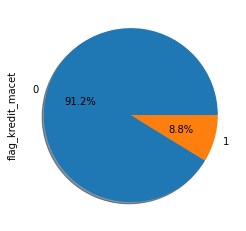

In [ ]:
# jika melihat perbandingan jumlah dari variabel flag_kredit_macet yang merupakan variabel y
df['flag_kredit_macet'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

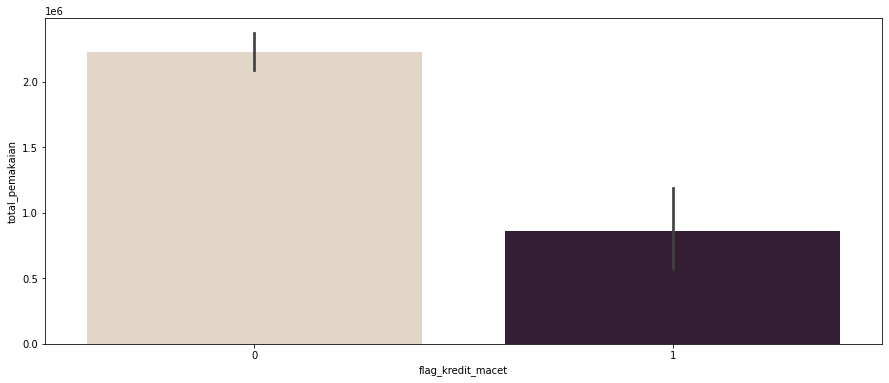

In [ ]:
# visualisasi total_pemakaian menggunakan berplot
plt.figure(figsize=(15,6))
sns.barplot(x='flag_kredit_macet', y='total_pemakaian', palette='ch:.25', data=df)
plt.show()
# didapatkan bahwa total pemakaian kartu kredit oleh pemilik flag_kredit_macet yang tidak baik lebih banyak dari yang baik

In [ ]:
# rata-rata tagihan dari pemegang kartu kredit yang terhitung baik
df.tagihan[df.flag_kredit_macet==1].mean()

14220792.072916666

In [ ]:
# rata-rata tagihan dari pemegang kartu kredit yang terhitung kurang baik
df.tagihan[df.flag_kredit_macet==0].mean()

2226411.6547610546

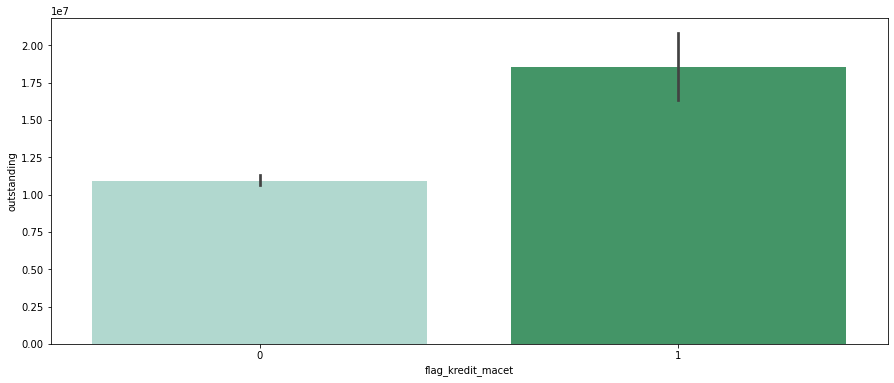

In [ ]:
# visualisasi total_pemakaian menggunakan barplot
plt.figure(figsize=(15,6))
sns.barplot(x='flag_kredit_macet', y='outstanding', palette='BuGn', data=df)
plt.show()
# didapatkan bahwa outstanding kartu kredit oleh pemilik flag_kredit_macet yang baik lebih banyak dari yang tidak baik

In [ ]:
# rata-rata outstanding dari pemegang kartu kredit yang terhitung baik
df.outstanding[df.flag_kredit_macet==1].mean()

18570850.06175595

In [ ]:
# rata-rata outstanding dari pemegang kartu kredit yang terhitung kurang baik
df.outstanding[df.flag_kredit_macet==0].mean()

10937695.454746768

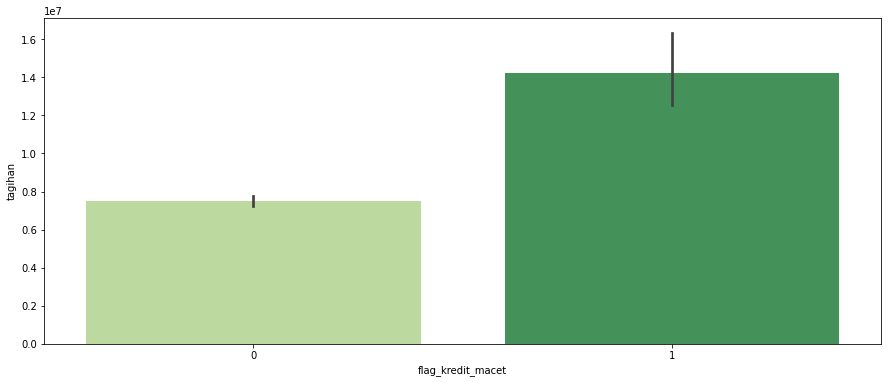

In [ ]:
# visualisasi total_pemakaian menggunakan barplot
plt.figure(figsize=(15,6))
sns.barplot(x='flag_kredit_macet', y='tagihan', palette='YlGn', data=df)
plt.show()
# didapatkan bahwa tagihan kartu kredit oleh pemilik flag_kredit_macet yang baik lebih banyak dari yang tidak baik

In [ ]:
# rata-rata tagihan dari pemegang kartu kredit yang terhitung baik
df.tagihan[df.flag_kredit_macet==1].mean()

0.022613379479110778

In [ ]:
# rata-rata tagihan dari pemegang kartu kredit yang terhitung kurang baik
df.tagihan[df.flag_kredit_macet==0].mean()

7498766.133509536

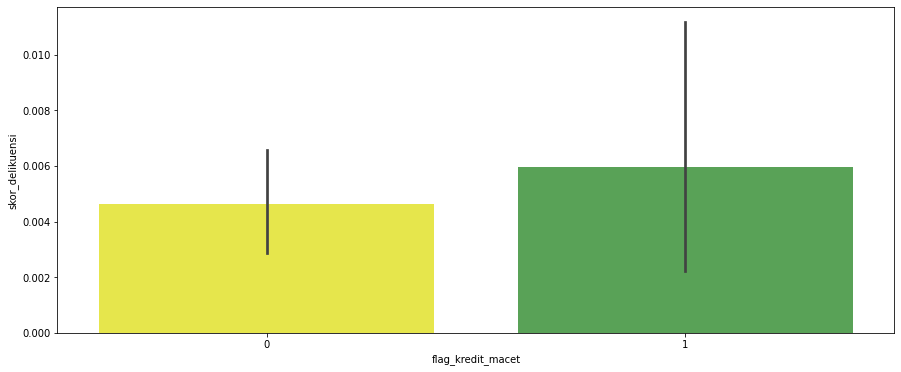

In [ ]:
# visualisasi total_pemakaian menggunakan barplot
plt.figure(figsize=(15,6))
sns.barplot(x='flag_kredit_macet', y='skor_delikuensi', palette='Set1_r', data=df)
plt.show()
# didapatkan bahwa total skor_delikuensi kartu kredit oleh pemilik flag_kredit_macet yang baik lebih banyak dari yang tidak baik

In [ ]:
# rata-rata skor_delikuensi dari pemegang kartu kredit yang terhitung baik
df.skor_delikuensi[df.flag_kredit_macet==1].mean()

0.005952380952380952

In [ ]:
# rata-rata skor_delikuensi dari pemegang kartu kredit yang terhitung kurang baik
df.skor_delikuensi[df.flag_kredit_macet==0].mean()

0.004643188799199943

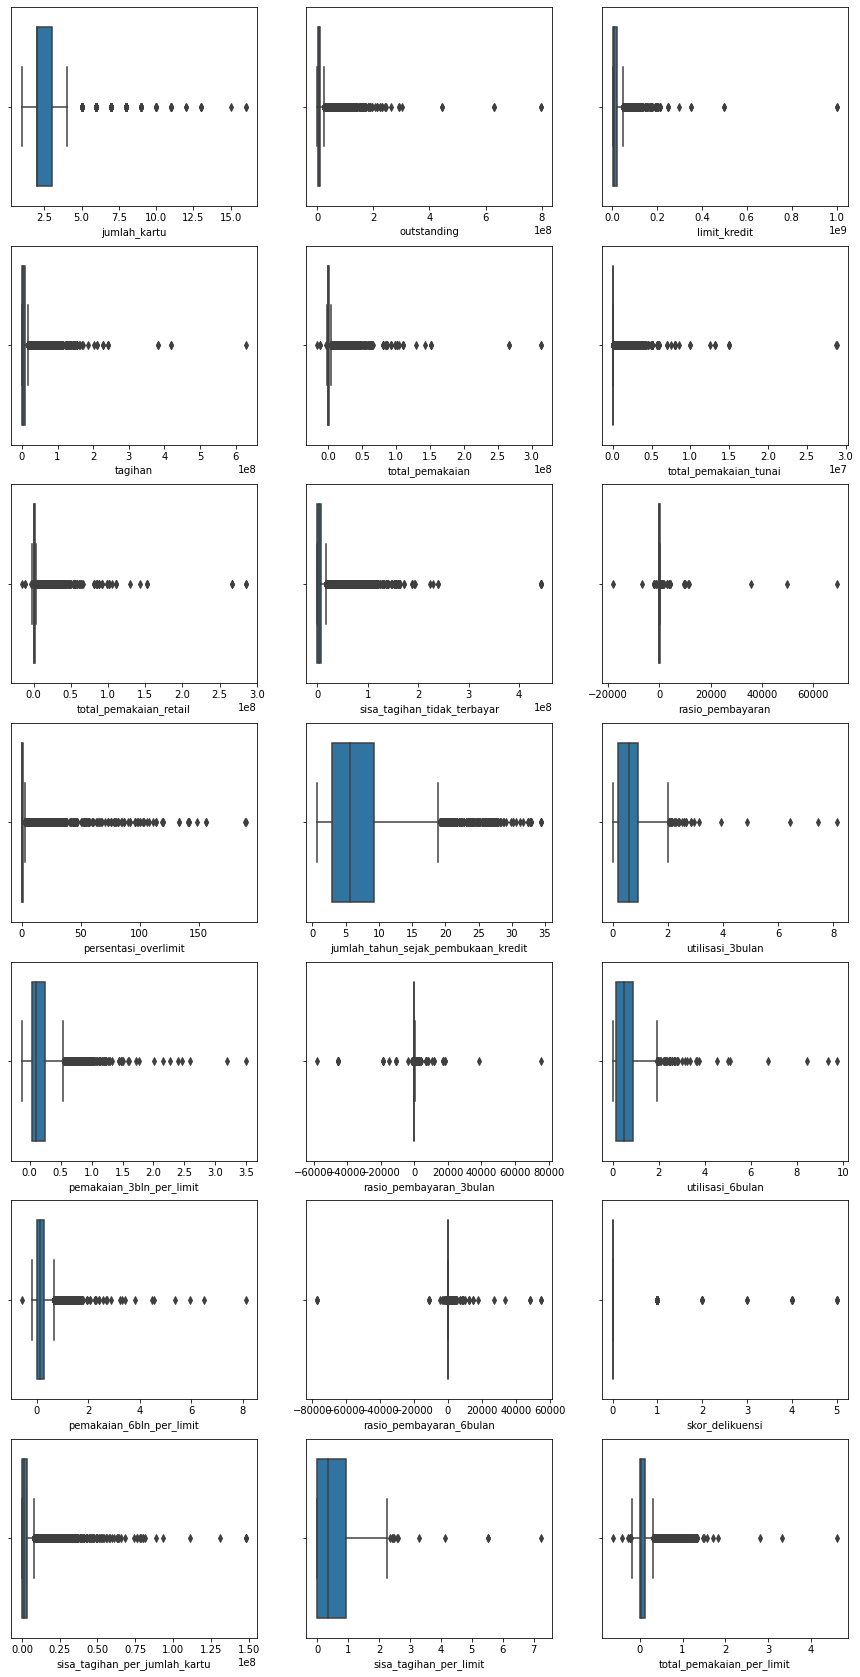

In [ ]:
# melihat outlier dengan boxplot
fig, axes = plt.subplots(7, 3, figsize=(15, 30))
sns.boxplot(df["jumlah_kartu"], ax=axes[0, 0])
sns.boxplot(df["outstanding"], ax=axes[0, 1])
sns.boxplot(df["limit_kredit"], ax=axes[0, 2])
sns.boxplot(df["tagihan"], ax=axes[1, 0])
sns.boxplot(df["total_pemakaian"], ax=axes[1, 1])
sns.boxplot(df["total_pemakaian_tunai"], ax=axes[1, 2])
sns.boxplot(df["total_pemakaian_retail"], ax=axes[2, 0])
sns.boxplot(df["sisa_tagihan_tidak_terbayar"], ax=axes[2, 1])
sns.boxplot(df["rasio_pembayaran"], ax=axes[2, 2])
sns.boxplot(df["persentasi_overlimit"], ax=axes[3, 0])
sns.boxplot(df["jumlah_tahun_sejak_pembukaan_kredit"], ax=axes[3, 1])
sns.boxplot(df["utilisasi_3bulan"], ax=axes[3, 2])
sns.boxplot(df["pemakaian_3bln_per_limit"], ax=axes[4, 0])
sns.boxplot(df["rasio_pembayaran_3bulan"], ax=axes[4, 1])
sns.boxplot(df["utilisasi_6bulan"], ax=axes[4, 2])
sns.boxplot(df["pemakaian_6bln_per_limit"], ax=axes[5, 0])
sns.boxplot(df["rasio_pembayaran_6bulan"], ax=axes[5, 1])
sns.boxplot(df["skor_delikuensi"], ax=axes[5, 2])
sns.boxplot(df["sisa_tagihan_per_jumlah_kartu"], ax=axes[6, 0])
sns.boxplot(df["sisa_tagihan_per_limit"], ax=axes[6, 1])
sns.boxplot(df["total_pemakaian_per_limit"], ax=axes[6, 2])
plt.show()

#### DATA PRE-PROCESSING

In [ ]:
# cek missing value
df.isnull().sum()

jumlah_kartu                             0
outstanding                              0
limit_kredit                             0
tagihan                                  0
total_pemakaian_tunai                    0
total_pemakaian_retail                   0
sisa_tagihan_tidak_terbayar              0
kode_cabang                            100
rasio_pembayaran                         0
persentasi_overlimit                     0
rasio_pembayaran_3bulan                  0
rasio_pembayaran_6bulan                  0
skor_delikuensi                          0
flag_kredit_macet                        0
jumlah_tahun_sejak_pembukaan_kredit      0
total_pemakaian                          0
sisa_tagihan_per_jumlah_kartu            0
sisa_tagihan_per_limit                   0
total_pemakaian_per_limit                0
pemakaian_3bln_per_limit                 0
pemakaian_6bln_per_limit                 0
utilisasi_3bulan                         0
utilisasi_6bulan                         0
dtype: int6

In [ ]:
# drop kolom dari missing value
df = df.drop(['kode_cabang'], axis=1)
pd.isnull(df).sum()

jumlah_kartu                           0
outstanding                            0
limit_kredit                           0
tagihan                                0
total_pemakaian_tunai                  0
total_pemakaian_retail                 0
sisa_tagihan_tidak_terbayar            0
rasio_pembayaran                       0
persentasi_overlimit                   0
rasio_pembayaran_3bulan                0
rasio_pembayaran_6bulan                0
skor_delikuensi                        0
flag_kredit_macet                      0
jumlah_tahun_sejak_pembukaan_kredit    0
total_pemakaian                        0
sisa_tagihan_per_jumlah_kartu          0
sisa_tagihan_per_limit                 0
total_pemakaian_per_limit              0
pemakaian_3bln_per_limit               0
pemakaian_6bln_per_limit               0
utilisasi_3bulan                       0
utilisasi_6bulan                       0
dtype: int64

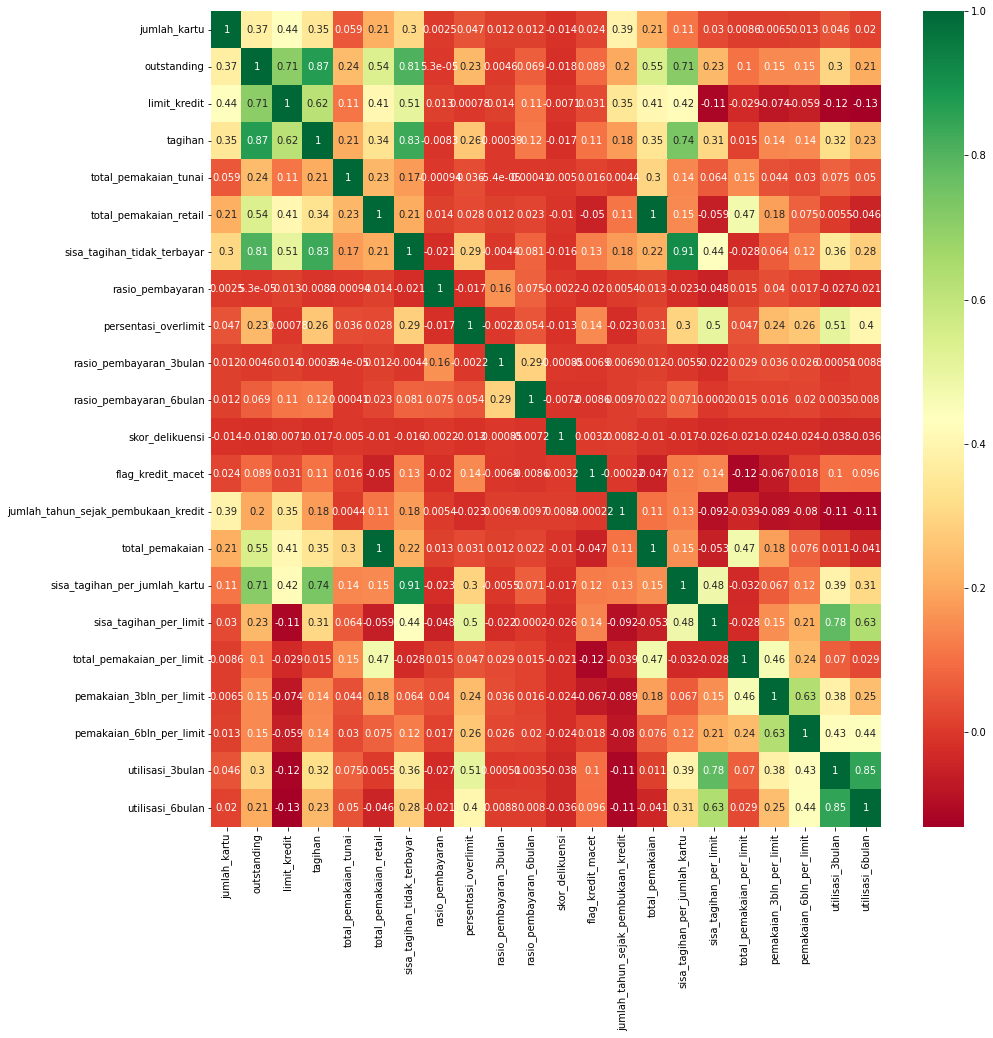

In [ ]:
# melihat korelasi antar variabel dengan heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap = 'RdYlGn', annot = True)
plt.show()

In [ ]:
# drop kolom dari variabel yang tingkat korelasinya rendah
df = df.drop(['total_pemakaian_tunai'], axis=1)
df = df.drop(['rasio_pembayaran'], axis=1)
df = df.drop(['rasio_pembayaran_3bulan'], axis=1)
df = df.drop(['rasio_pembayaran_6bulan'], axis=1)
df = df.drop(['skor_delikuensi'], axis=1)

#### FEATURE ENGINEERING

In [ ]:
df.head()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,persentasi_overlimit,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
X,,,,,,,,,,,,,,,,,
92,5,5972272,6000000.0,5068230.0,0.0,5206434.0,0.00,0,9.916667,0.0,1041286.8,0.867739,0.000000,0.059401,0.041536,0.919164,0.919635
316,2,136453,65000000.0,128750.0,0.0,0.0,0.00,0,3.500000,0.0,0.0,0.000000,0.000000,0.023722,0.013271,0.022847,0.007724
624,1,1354080,3000000.0,1369203.0,15000.0,0.0,0.00,0,8.500000,15000.0,0.0,0.000000,0.005000,0.145833,0.000000,0.627426,0.899309
628,2,1076660,49000000.0,752108.0,775440.0,0.0,0.00,0,4.333333,775440.0,0.0,0.000000,0.015825,0.017617,0.177094,0.013699,0.255363
947,3,42281368,34000000.0,43130581.0,0.0,41144841.0,22.63,1,7.000000,0.0,13714947.0,1.210142,0.000000,0.412361,0.014556,1.205087,1.116092


In [ ]:
# scalling
transformation_svm = MinMaxScaler().fit(df[['jumlah_kartu','outstanding','limit_kredit','tagihan','total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar', 'persentasi_overlimit', 'flag_kredit_macet', 'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian', 'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit', 'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan']])
df[['jumlah_kartu','outstanding','limit_kredit','tagihan','total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar', 'persentasi_overlimit', 'flag_kredit_macet', 'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian', 'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit', 'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan']]=transformation_svm.transform(df[['jumlah_kartu','outstanding','limit_kredit','tagihan','total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar', 'persentasi_overlimit', 'flag_kredit_macet', 'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian', 'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit', 'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan']])
 
df.head()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,persentasi_overlimit,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
X,,,,,,,,,,,,,,,,,
92,0.266667,0.007484,0.003009,0.008039,0.052108,0.011726,0.000000,0.0,0.272277,0.047524,0.007036,0.119853,0.120795,0.051272,0.070346,0.113087,0.094515
316,0.066667,0.000171,0.062187,0.000173,0.052108,0.000000,0.000000,0.0,0.081683,0.047524,0.000000,0.000000,0.120795,0.041406,0.067090,0.002776,0.000794
624,0.000000,0.001697,0.000000,0.002148,0.052158,0.000000,0.000000,0.0,0.230198,0.047570,0.000000,0.000000,0.121751,0.075175,0.065561,0.077183,0.092426
628,0.066667,0.001349,0.046138,0.001166,0.054687,0.000000,0.000000,0.0,0.106436,0.049876,0.000000,0.000000,0.123820,0.039717,0.085965,0.001650,0.026245
947,0.133333,0.052980,0.031093,0.068650,0.052108,0.092669,0.119105,1.0,0.185644,0.047524,0.092669,0.167147,0.120795,0.148883,0.067238,0.148276,0.114706


In [ ]:
# membagi train test data
X = df.drop('flag_kredit_macet', axis=1)
y = df['flag_kredit_macet']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  10740
y Train :  10740
X Test :  4603
t Test :  4603


In [ ]:
# mengatasi unbalanced data dengan SMOTE
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print("Before oversampling: ", Counter(y_train))

Before oversampling:  Counter({0.0: 9755, 1.0: 985})


In [ ]:
oversample=SMOTE()
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X, y)
print("After oversampling: ", Counter(y_train_SMOTE))

After oversampling:  Counter({0.0: 13999, 1.0: 13999})


#### MODELING


Logistic Regression (before SMOTE)

In [ ]:
input = sm.add_constant(X_train)

In [ ]:
model = sm.Logit(y_train, X_train, missing='drop')
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.277728
         Iterations 8
                                    Results: Logit
Model:                      Logit                   Pseudo R-squared:       0.094      
Dependent Variable:         flag_kredit_macet       AIC:                    5997.5977  
Date:                       2021-11-02 09:59        BIC:                    6114.1054  
No. Observations:           10740                   Log-Likelihood:         -2982.8    
Df Model:                   15                      LL-Null:                -3291.6    
Df Residuals:               10724                   LLR p-value:            6.2253e-122
Converged:                  1.0000                  Scale:                  1.0000     
No. Iterations:             8.0000                                                     
---------------------------------------------------------------------------------------
                                     Coef.   Std.Err.  

In [ ]:
# odds ratio
round(np.exp(result.params), 3)

jumlah_kartu                           1.187000e+00
outstanding                            2.660050e+02
limit_kredit                           3.280000e-01
tagihan                                1.938800e+01
total_pemakaian_retail                 0.000000e+00
sisa_tagihan_tidak_terbayar            1.547000e+00
persentasi_overlimit                   3.749400e+01
jumlah_tahun_sejak_pembukaan_kredit    8.190000e-01
total_pemakaian                        2.770935e+21
sisa_tagihan_per_jumlah_kartu          1.710000e-01
sisa_tagihan_per_limit                 3.764870e+02
total_pemakaian_per_limit              0.000000e+00
pemakaian_3bln_per_limit               0.000000e+00
pemakaian_6bln_per_limit               1.962212e+03
utilisasi_3bulan                       1.870000e-01
utilisasi_6bulan                       1.276000e+00
dtype: float64

In [ ]:
# prediksi
prediction = result.predict(X_test)

In [ ]:
pred_results = pd.DataFrame(prediction, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x: 1 if x > 0.5 else 0)
pred_results['actual'] = y_test
pred_results.head()

,logreg_pred,prediksi,actual
X,,,
1545,0.080378,0,0.0
2316,0.136720,0,1.0
7059,0.088062,0,0.0
8397,0.147480,0,0.0
2132,0.019832,0,0.0


In [ ]:
print('Test accuracy =  {:.3f}'.format(accuracy_score(pred_results['actual'], pred_results["prediksi"])))
print('Test precision =  {:.3f}'.format(precision_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test recall =  {:.3f}'.format(recall_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test f-score =  {:.3f}'.format(f1_score(pred_results['actual'], pred_results["prediksi"], average='binary')))

Test accuracy =  0.921
Test precision =  0.353
Test recall =  0.017
Test f-score =  0.032


SKLEARN (before SMOTE)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,persentasi_overlimit,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,flag_kredit_macet,prediction
X,,,,,,,,,,,,,,,,,,
1545,0.066667,0.000856,0.019057,0.001014,0.052108,0.001592,0.000000,0.277228,0.047524,0.002388,0.004438,0.120795,0.039870,0.068611,0.005796,0.005729,0.0,0.0
2316,0.200000,0.029347,0.019057,0.036353,0.052108,0.050918,0.035000,0.589604,0.049041,0.038188,0.142265,0.125134,0.110619,0.107847,0.124266,0.058479,1.0,0.0
7059,0.066667,0.000097,0.002006,0.000113,0.052108,0.000169,0.000000,0.049604,0.047524,0.000254,0.002072,0.120795,0.034861,0.068867,0.002229,0.005190,0.0,0.0
8397,0.066667,0.004314,0.000000,0.003670,0.053734,0.007912,0.077895,0.163366,0.049008,0.011867,0.161602,0.151950,0.098175,0.162692,0.127959,0.101131,0.0,0.0
2132,0.066667,0.013998,0.012036,0.007490,0.067800,0.019088,0.000000,0.027327,0.061835,0.028632,0.078039,0.181002,0.141040,0.106003,0.112205,0.058582,0.0,0.0


In [ ]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.908
Accuracy of logistic regression classifier test data: 0.922


Logistic regresion (after SMOTE)

In [ ]:
input = sm.add_constant(X_train_SMOTE)

In [ ]:
model = sm.Logit(y_train_SMOTE, X_train_SMOTE, missing='drop')
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.617567
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.109     
Dependent Variable: y                AIC:              34613.2986
Date:               2021-11-02 09:59 BIC:              34745.1368
No. Observations:   27998            Log-Likelihood:   -17291.   
Df Model:           15               LL-Null:          -19407.   
Df Residuals:       27982            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
       Coef.     Std.Err.      z       P>|z|     [0.025     0.975] 
-------------------------------------------------------------------
x1      0.6401     0.2725     2.3486   0.0188     0.1059     1.1742
x2     -4.9138     1.4664    -3.3509   0.0008    -7.7879  

In [ ]:
prediction = result.predict(X_test)

In [ ]:
pred_results = pd.DataFrame(prediction, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x: 1 if x > 0.5 else 0)
pred_results['actual'] = y_test
pred_results.head()

,logreg_pred,prediksi,actual
X,,,
1545,0.435751,0,0.0
2316,0.649541,1,1.0
7059,0.446416,0,0.0
8397,0.797958,1,0.0
2132,0.177458,0,0.0


In [ ]:
print('Test accuracy =  {:.3f}'.format(accuracy_score(pred_results['actual'], pred_results["prediksi"])))
print('Test precision =  {:.3f}'.format(precision_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test recall =  {:.3f}'.format(recall_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test f-score =  {:.3f}'.format(f1_score(pred_results['actual'], pred_results["prediksi"], average='binary')))

Test accuracy =  0.720
Test precision =  0.147
Test recall =  0.540
Test f-score =  0.231


SKLEARN (after SMOTE)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,persentasi_overlimit,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,flag_kredit_macet,prediction
X,,,,,,,,,,,,,,,,,,
1545,0.066667,0.000856,0.019057,0.001014,0.052108,0.001592,0.000000,0.277228,0.047524,0.002388,0.004438,0.120795,0.039870,0.068611,0.005796,0.005729,0.0,0.0
2316,0.200000,0.029347,0.019057,0.036353,0.052108,0.050918,0.035000,0.589604,0.049041,0.038188,0.142265,0.125134,0.110619,0.107847,0.124266,0.058479,1.0,1.0
7059,0.066667,0.000097,0.002006,0.000113,0.052108,0.000169,0.000000,0.049604,0.047524,0.000254,0.002072,0.120795,0.034861,0.068867,0.002229,0.005190,0.0,1.0
8397,0.066667,0.004314,0.000000,0.003670,0.053734,0.007912,0.077895,0.163366,0.049008,0.011867,0.161602,0.151950,0.098175,0.162692,0.127959,0.101131,0.0,1.0
2132,0.066667,0.013998,0.012036,0.007490,0.067800,0.019088,0.000000,0.027327,0.061835,0.028632,0.078039,0.181002,0.141040,0.106003,0.112205,0.058582,0.0,0.0


In [ ]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(LR.score(X_train_SMOTE, y_train_SMOTE)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.695
Accuracy of logistic regression classifier test data: 0.680


#### EVALUATION

In [ ]:
# Memilih k-fold (dipilih k = 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(logreg, X_train, y_train, cv=kfold)
print("Cross-validation scores: {:.3f}".format(scores.mean()))

Cross-validation scores: 0.908


In [ ]:
param_grid_lr = { 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'class_weight':['balanced', None]}

grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=kfold)
grid_search_lr.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.3}".format(grid_search_lr.best_score_))

Best parameters: {'C': 0.001, 'class_weight': None}
Best cross-validation score: 0.908


In [ ]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}
 
acc = []
f1 = []
prec = []
recall = []

logreg = LogisticRegression(C = 10, max_iter=200)
scores = cross_validate(logreg, X, y, cv=kfold, scoring=scoring)
 
acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())
 
 
print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

Accuracy scores:  [0.9122732774181653]
f1 scores:  [0.03389424682552095]
Precision scores:  [0.4924542124542124]
Recall scores:  [0.01760218052729225]


In [ ]:
# Terapkan pada data test (sebelum SMOTE)
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
 
print("Accuracy score: ", accuracy_score(predictions, y_test))
print("Recall score: ", recall_score(predictions, y_test))

Accuracy score:  0.9215728872474473
Recall score:  0.42857142857142855


SMOTE

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(logreg, X_train_SMOTE, y_train_SMOTE, cv=kfold)
print("Cross-validation scores: {:.3f}".format(scores.mean()))

Cross-validation scores: 0.675


In [ ]:
param_grid_lr = { 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'class_weight':['balanced', None]}

grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=kfold)
grid_search_lr.fit(X_train_SMOTE, y_train_SMOTE)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.3}".format(grid_search_lr.best_score_))

Best parameters: {'C': 100, 'class_weight': None}
Best cross-validation score: 0.719


In [ ]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}
 
acc = []
f1 = []
prec = []
recall = []
 
logreg = LogisticRegression(C = 10, max_iter=200)
scores = cross_validate(logreg, X_train_SMOTE, y_train_SMOTE, cv=kfold, scoring=scoring)
 
acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())
 
 
print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy scores:  [0.71680122725997]
f1 scores:  [0.7352221864717062]
Precision scores:  [0.6904164648867486]
Recall scores:  [0.7864747065750741]


In [ ]:
# Terapkan pada data test (setelah SMOTE)
logreg.fit(X_train_SMOTE, y_train_SMOTE)
predictions = logreg.predict(X_test)
 
print("Accuracy score: ", accuracy_score(predictions, y_test))
print("Recall score: ", recall_score(predictions, y_test))
print("Recall score: ", recall_score(predictions, y_train))

Accuracy score:  0.6580490984140778
Recall score:  0.15813168261114238


ValueError: ignored

In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 7.4 MB/s 


In [ ]:
# feature importance

import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=1)
df = RandomForestClassifier(n_estimators=100, random_state=0).fit(train_X, train_y)

In [ ]:
perm = PermutationImportance(df, random_state=1).fit(val_X,val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0036 ± 0.0014,sisa_tagihan_per_jumlah_kartu
0.0031 ± 0.0012,outstanding
0.0027 ± 0.0011,pemakaian_6bln_per_limit
0.0026 ± 0.0017,persentasi_overlimit
0.0024 ± 0.0016,pemakaian_3bln_per_limit
0.0022 ± 0.0004,sisa_tagihan_tidak_terbayar
0.0021 ± 0.0013,jumlah_tahun_sejak_pembukaan_kredit
0.0019 ± 0.0012,tagihan
0.0018 ± 0.0010,utilisasi_3bulan
0.0018 ± 0.0011,total_pemakaian_per_limit


### LOAD AND PREDICT NEW DATA

### KESIMPULAN/SARAN

Untuk hasil evaluasi model didapat hasil yang lumayan bagus, sebelum diterapkan pada data. tetapi setelah diterapkan pada data test, hasilnya menjadi tidak bagus. Apabila dilihat hasil scoring data train dan test, score juga juga lumayan. dapat disimpulkan bahwa model mengalami underfitting atau overfitting.